## Retningsvektorfelt og Eulers metode

Hvis vi ikke kjenner noen løsning til vår differensialligning kan vi bruke
$$x'(t) = f(t, x(t))$$
til å tegne retningsvektorer $f(t, x)$ i punkter $(t, x)$. 

Dette er illustrert under for differensialligningen
$$x'(t) = f(t, x(t)) = x(t).$$

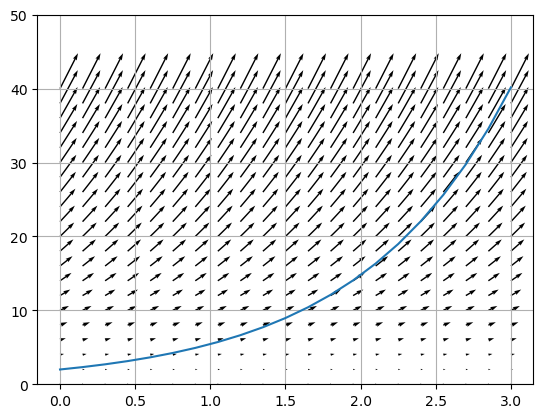

In [1]:
# @title På vei mot Eulers metode
import numpy as np
import matplotlib.pyplot as plt

# Definer funksjonen x_2(t) = 2e^t
def x_2(t):
  return 2 * np.exp(t)

# Definer funksjonen f(t, x) = x
def f(t, x):
  return x

n = 20


# Definerer x- og y-verdiene
t = np.linspace(0, 3, num=n+1)
x = np.linspace(0, 40, num=n+1)

# Lager et firkantet gitter av de oppgitte x- og y-verdiene
T, X = np.meshgrid(t, x)

# Definerer f med hensyn på T og X
F = f(T, X)

# Definerer "steget" i t- og x-retning
dt = np.ones_like(T)
dx = F

# plt.quiver tar for seg å lage alle tangentpilene [dt, dx] i alle punktene som opptrer i gitteret vi lagde.
plt.quiver(T, X, dt, dx, scale=500, scale_units='width', color='black', angles='xy')
plt.plot(t, x_2(t), label='x(t) = 2e^t')
plt.ylim((0, 50))
plt.grid()
plt.show()

La oss si at vi om en løsning $x(t)$ til differensialligningen 
$$x'(t) = x(t)$$
vet at 
$$x(0) = 2.$$

Vi kan starte til venstre i punktet $(0, 2)$ og ta et steg med pilen som begynner der. Da havner vi omtrent på den blå kurven, og vi kan gå langs en pil som begynner der vi havner, og så videre. Dette er en grov beskivelse av Eulers metode for løsning av diffligninger som også er illustrert under.

# Eulers metode

Gitt en diffligning
$$x'(t) = f(t,x(t)) \quad \text{med} \quad x(t_0) = x_0$$
og jevnt fordelte $t$-verdier $t_0 < t_1 < t_2 < \dots < t_n$ med steglengde $\Delta t = t_1 - t_0$
vil vi finne en tilnærming av verdiene $x_1 = x(t_1), \dots, x_n = x(t_n)$
til løsningen $x(t)$ med $x(t_0) = x_0$.

Vi starter med å la $x_1 = x_0 + \Delta t \cdot f(t_0, x_0)$, og fortsetter med å la $x_2 = x_1 + \Delta t \cdot f(t_1, x_1)$.
Hvis vi har beregnet tilnærminger frem til en tilnærming $x_i$ til $x(t_i)$ lar vi $x_{i+1} = x_i + \Delta t \cdot f(t_i, x_i)$.

![eulersmetode](figures/Euler_method.svg)
[Public Domain](https://commons.wikimedia.org/w/index.php?curid=2143753)

**Koden under anvender Eulers metode.**

In [2]:
import numpy as np

def eulers_metode(f, t0, x0, tn, n):
    """
    Bruker Eulers metode for å løse differensiallikningen x' = f(t, x).
    
    Args:
    f: Funksjonen som representerer høyresiden av differensiallikningen.
    t0: Startverdien for t.
    x0: Startverdien for x.
    tn: Siste verdi av t.
    n: Antall steg.
    
    Returns:
    To NumPy-arrayer:
    t: inneholder t-verdiene der x-verdiene er tilnærmet
    x: inneholder de tilnærmede x-verdiene for hvert steg.
    """
    # produserer t-verdiene t0, t1, ..., tn
    t_values = np.linspace(t0, tn, n + 1)
    # første x-verdi er x0
    x_values = [x0]
    # steglengden for t beregnes
    delta_t = t_values[1] - t_values[0]

    # for t0, t1, ..., t(n-1) beregner vi x-verdier
    for t_val in t_values[:-1]:
        # neste x-verdi er lik forrige x-verdi pluss steglengden gange 
        # funksjonsverdien i paret bestående av forrige t-verdi og forrige x-verdi
        x_next = x_values[-1] + delta_t * f(t_val, x_values[-1])
        # legg den neste x-verdien til i listen av x-verdier
        x_values.append(x_next)
    
    return t_values, np.array(x_values)


In [3]:
# Forteller python om funksjonen f(t, x) = x
def f(t, x):
  return x

In [4]:
# Sett startverdier og parametre
t0 = -1   # Første t-verdi
x0 = 2  # Første x-verdi
tn = 1  # Siste t-verdi
n = 4   # Antall steg

# Anvend Eulers metode
t_values, x_values = eulers_metode(f, t0, x0, tn, n)

In [5]:
# Fortell python om den eksakte løsningen xx(t) = e^t

def xx(t):
    return x0 * np.exp(t - t0)

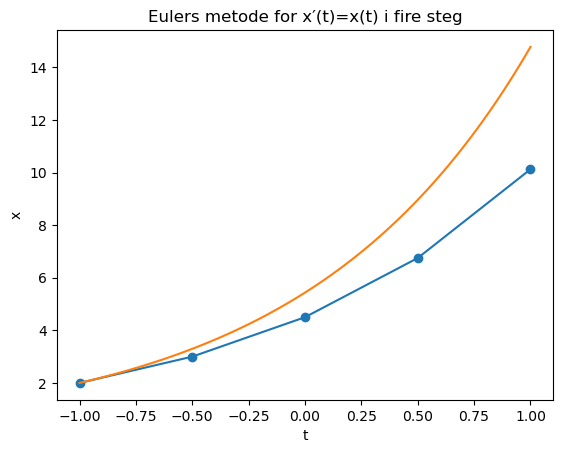

In [6]:
# Vi plotter resultatet, med prikker for tallene vi beregnet i Eulers metode
# sammen med den eksakte løsningen til diffligningen.

plt.plot(t_values, x_values)
plt.scatter(t_values, x_values)
t = np.linspace(t0, tn, 100)
plt.plot(t, xx(t))
plt.xlabel('t')
plt.ylabel('x')
plt.title(r"Eulers metode for x′(t)=x(t) i fire steg");

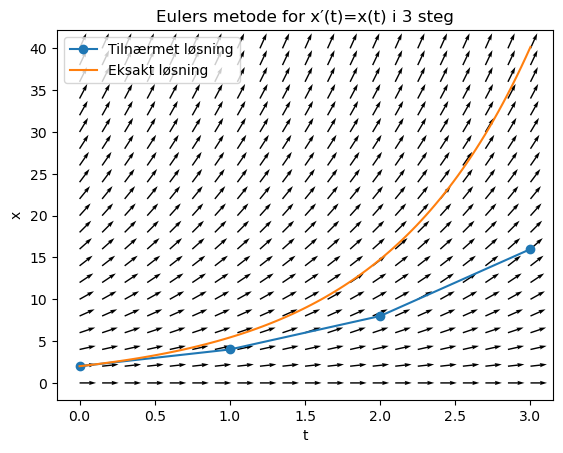

In [7]:
# @title Plot med retningsdiagram og steg av metoden til Euler
# Definer funksjonen y(x) = 2e^x
def x_2(t):
  return 2 * np.exp(t)

N = 20


# Definerer t- og x-verdiene
t = np.linspace(0, 3, num=N+1)
x = np.linspace(0, 40, num=N+1)

# Set the initial conditions and parameters
t0 = t[0]   # Første t-verdi
x0 = 2  # Iinital x-verdi
tn = t[-1]  # Siste t-verdi
n = 3   # Antall steg for Eulers metode

# Anvend Eulers metode
t_values, x_values = eulers_metode(f, t0, x0, tn, n)

# Lager et firkantet gitter av de oppgitte x- og y-verdiene
T, X = np.meshgrid(t, x)

# Definerer f med hensyn på T og X
F = f(T, X)

# Definerer "steget" i x- og y-retning
dt = np.ones_like(T)
dx = F
r = (dt**2 + dx**2)**0.5

# plt.quiver tar for seg å lage alle tangentpilene [dt, dx] i alle punktene som opptrer i gitteret vi lagde.
plt.quiver(T, X, dt/r, dx/r, scale=30, scale_units='width', color='black', angles='xy')
# plt.quiver(T, X, dt/r, dx/r, scale=3.5, scale_units='width', color='black', angles='xy')
plt.plot(t_values, x_values, '-o', label=r'Tilnærmet løsning')
tt = np.linspace(t0, tn, 100)
plt.plot(tt, 2*np.exp(tt), label=r'Eksakt løsning')
# plt.ylim((0, 50))
# plt.grid()
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='upper left')
plt.title(r"Eulers metode for x′(t)=x(t) i " + f"{n} steg");

## Eksempel: Eksponensiell vekst.

La oss si at vi har en populasjon av bakterier, lakselus eller en annen organisme som vokser med tiden $t$.

La oss si at den totale vekten av populasjonen til tiden $t$ er git ved tallet $x(t)$.

La oss endelig anta at det er ubegrenset næring og plass slik at det eneste som bestemmer hvor fort vekten $x(t)$ vokser er vekten $x(t)$ selv.

Da har vi en differensialligning:

$$x'(t) = f(t, x(t)) = k \cdot x(t).$$

Her er $k$ en parameter, kalt vekstraten, som vi kanskje ikke kjenner. Denne parameteren vil kunne bestemmes omtrentlig ved hjelp av målinger. 

La oss si at vi har funnet ut at $k = 1$! (Det går an å analysere differensialligningen uten å kjenne $k$.)

La oss velge enheter slik at vi har en enhet av vekt til tiden $t=0$:
$$x(0) = 1.$$

Da har vi:
$$x'(t) = x(t) \quad \text{med} \quad x(0) = 1.$$


### Oppgave:

Modifiser koden over slik at den løser denne differensialligningen. Tegn både retningsdiagram, tilnærmet løsning i tidsintervallet $[0,2]$ i fire steg, og eksakt løsning. Du kan finne [hints her](Eksponensiell_Vekst.ipynb).

## Eksempel: Logistisk vekst.

La oss si at vi har en populasjon av bakterier, lakselus eller en annen organisme som vokser med tiden $t$.

La oss si at den totale vekten av populasjonen til tiden $t$ er git ved tallet $x(t)$.

La oss endelig anta at det er begrenset næring og plass slik at jo større organismen blir, jo langsomere vokser den.

En differensialligning som modellerer dette er logistisk vekst differensialligningen:

$$x'(t) = f(t, x(t)) = k \cdot x(t) \cdot (K - x(t)) = k\cdot K \cdot x(t) - k\cdot x(t)^2.$$

Her er $k$ og $K$ parametre som vi kanskje ikke kjenner. 

Når $x(t)$ er nær $0$ kan vi se bort fra termen $k\cdot x(t)^2$, og vi får omtrent en eksponensiell vekst med vekstrate $k \cdot K$.
Derfor kalles også her tallet $k \cdot K$ vekstraten mens tallet $K$ er **kapasiteten** til systemet.

Bemerk at hvis $x(t) = K$, da blir $x'(t) = 0$, så $x(t) = K$ er en løsning til logistisk vekst differensialligningen. Vi vet også at for $x(t)$ nær $0$ vokser funksjonen $x(t)$ nærmest eksponensiellt.

### Eksakt løsning til logistisk vekst.

Differensialligningen

$$x'(t) = k \cdot x(t) \cdot (K - x(t))  \quad \text{med} \quad x(0) = x_0$$

har løsningen

$$x(t) = \frac{K\cdot x_0 \cdot e^{k\cdot K \cdot t}}{K + x_0 \cdot (e^{k \cdot K \cdot t} - 1)}$$

### Oppgave:

Modifiser koden over slik at den løser denne logistiske differensialligningen med
$k=1$, $K=10$ og $x_0 = 1$. 

Tegn både retningsdiagram, tilnærmet løsning i tidsintervallet $[0,1]$ i fire steg, og eksakt løsning. Du kan finne [hints her](Logistisk_Vekst.ipynb).

## Hjelpekode

Hvis vi vil lage mange figurer med retningsvektorfelt og numerisk løsning ved Eulers metode i forskjellige antall steg kan det være en hjelp å lage en funksjon `plot_retningsvektorer_og_euler_løsning(f, t, x0, antall_eulersteg, antall_piler)`  

In [20]:
def plot_retningsvektorer_og_euler_løsning(f, t, x0, antall_eulersteg=10):

    # Set the initial conditions and parameters
    t0 = t[0]   # Første x-verdi
    x0 = 1  # Iinital x-verdi
    tn = t[-1]  # Siste t-verdi
    n = antall_eulersteg   # Antall steg for Eulers metode


    # Anvend Eulers metode
    t_values, x_values = eulers_metode(f, t0, x0, tn, n)

    # Definerer x-verdiene for retningsvektorene
    x = np.linspace(x0, x_values[-1], num=len(t))

    # Lager et firkantet gitter av de oppgitte x- og y-verdiene
    T, X = np.meshgrid(t, x)

    # Beregner f med hensyn på T og X
    F = f(T, X)

    # Definerer "steget" i x- og y-retning
    dt = np.ones_like(T)
    dx = F
    r = (dt**2 + dx**2)**0.5

    # plt.quiver tar for seg å lage alle tangentpilene [dt, dx] i alle punktene som opptrer i gitteret vi lagde.
    plt.quiver(T, X, dt/r, dx/r, color='black', angles='xy')
    plt.plot(t_values, x_values, '-o', label=r'Tilnærmet løsning')
    # plt.ylim((0, 50))
    # plt.grid()
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend(loc='upper left')
    plt.title(r"Eulers metode for x′(t)=x(t) i " + f"{n} steg");

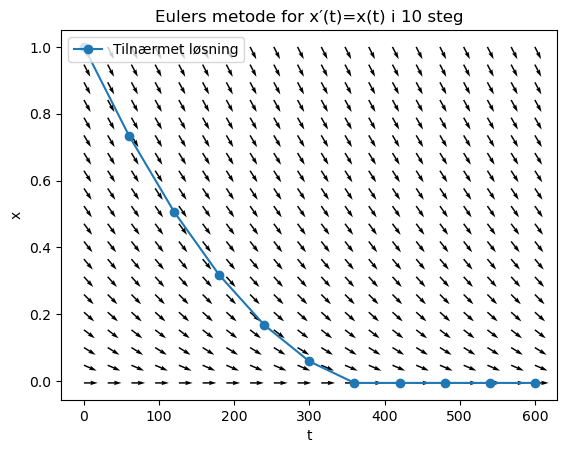

In [25]:
t = np.linspace(0, 600, 20)
plot_retningsvektorer_og_euler_løsning(f=f, t=t, x0=1, antall_eulersteg=10)

## Scipy funksjoner for løsning av diffligninger.

Programvarepakken `scipy` har mye funksjonalitet. Den kan også løse differensialligninger. En av de heter [solve_ivp.](https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.integrate.solve_ivp.html) Det er en forkortelse av "solve initial value problem".

In [12]:
from scipy.integrate import solve_ivp

In [13]:
sol = solve_ivp(f, [0, 600], [1], dense_output=True)

In [14]:
t = np.linspace(0, 600, 300)
z = sol.sol(t)

In [15]:
t.shape

(300,)

In [16]:
z.shape

(1, 300)

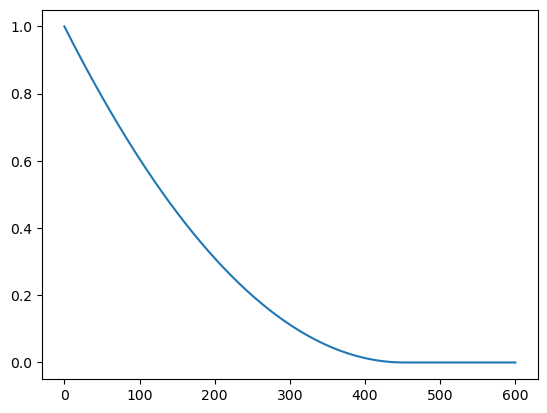

In [17]:
plt.plot(t, z[0])

## Om feil i Eulers metode

Det kan gjøres analyse av hvordan steglengden $\Delta t$ i Eulers metode påvirker nøyaktigheten av resultatet. For hvert steg som gjøres er feilen av orden $(\Delta t)^2$. Siden antall steg som gjøres for å komme fra initialverdien $t_0$ til sluttverdien er omvendt proporsjonalt med $\Delta t$ blir den globale feilen i Eulers metode av orden $\Delta t$.

## Test deg selv

**Du kan teste deg selv i dette stoffet på en [quiz fra fjorårets eksamen.](https://mitt.uib.no/courses/50911/quizzes/48226)**